#📌 Extracción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data_json = response.json()
df = pd.json_normalize(data_json)

In [5]:
new_columns = map(lambda x: x.split('.')[1], df.columns.to_list()[2:19])
last_columns = map(lambda x: x.split('.')[2], df.columns.to_list()[19:21])
first_columns = df.columns.to_list()[:2]
new_columns = list(new_columns)
last_columns = list(last_columns)
headers = list(map(lambda x: str(x).capitalize(), first_columns + new_columns + last_columns))

#Aplicar nuevos headers a la tabla
df.columns = headers
# df.columns

### Casting & Format

In [6]:
# Eliminar duplicados
df = df.drop_duplicates(subset=['Customerid'])

df['Churn'] = df['Churn'].astype(bool)
df['Partner'] = df['Partner'].astype(bool)
df['Dependents'] = df['Dependents'].astype(bool)
df['Techsupport'] = df['Techsupport'].astype(bool)
df['Streamingtv'] = df['Streamingtv'].astype(bool)
df['Onlinebackup'] = df['Onlinebackup'].astype(bool)
df['Phoneservice'] = df['Phoneservice'].astype(bool)
df['Seniorcitizen'] = df['Seniorcitizen'].astype(bool)
df['Multiplelines'] = df['Multiplelines'].astype(bool)
df['Streamingmovies'] = df['Streamingmovies'].astype(bool)
df['Deviceprotection'] = df['Deviceprotection'].astype(bool)

# Convertir a numérico (errors='coerce' convierte errores en NaN, como strings vacíos)
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df['Total'] = df['Total'].fillna(0)
df['Total'] = df['Total'].round(2)

# Redondear el valor real (equivalente a ROUND(col, 2))
df['Monthly'] = df['Monthly'].round(2)

df['Contract'] = df['Contract'].astype(str)
df['Paymentmethod'] = df['Paymentmethod'].astype(str)
df['Internetservice'] = df['Internetservice'].astype(str)

# Opcional: Formato de visualización global para el notebook
# pd.options.display.float_format = '{:.2f}'.format

In [7]:
#Evaluacion de valores unicos en las columnas Contract y Paymentmethod
print(df['Contract'].unique())
print(df['Paymentmethod'].unique())
print(df['Internetservice'].unique())

['One year' 'Month-to-month' 'Two year']
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
['DSL' 'Fiber optic' 'No']


In [8]:
df.info()
df.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customerid        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   Gender            7267 non-null   object 
 3   Seniorcitizen     7267 non-null   bool   
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   Tenure            7267 non-null   int64  
 7   Phoneservice      7267 non-null   bool   
 8   Multiplelines     7267 non-null   bool   
 9   Internetservice   7267 non-null   object 
 10  Onlinesecurity    7267 non-null   object 
 11  Onlinebackup      7267 non-null   bool   
 12  Deviceprotection  7267 non-null   bool   
 13  Techsupport       7267 non-null   bool   
 14  Streamingtv       7267 non-null   bool   
 15  Streamingmovies   7267 non-null   bool   
 16  Contract          7267 non-null   object 


,Customerid,Churn,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthly,Total
4163,5701-ZIKJE,True,Male,False,True,True,13,True,True,DSL,No,True,True,True,True,True,Month-to-month,Yes,Mailed check,50.55,610.75
5314,7252-NTGSS,True,Female,False,True,True,1,True,True,DSL,No,True,True,True,True,True,Month-to-month,No,Mailed check,45.15,45.15
5324,7271-AJDTL,True,Female,False,True,True,55,True,True,Fiber optic,No,True,True,True,True,True,Month-to-month,Yes,Credit card (automatic),94.45,5073.10
3725,5135-GRQJV,True,Male,True,True,True,72,True,True,Fiber optic,Yes,True,True,True,True,True,Two year,Yes,Mailed check,114.50,8331.95
7161,9845-PEEKO,True,Female,True,True,True,59,True,True,Fiber optic,No,True,True,True,True,True,Two year,Yes,Credit card (automatic),79.20,4590.35
5709,7801-CEDNV,True,Male,False,True,True,27,True,True,DSL,Yes,True,True,True,True,True,One year,No,Credit card (automatic),48.70,1421.75
1885,2673-CXQEU,True,Female,True,True,True,56,True,True,Fiber optic,Yes,True,True,True,True,True,One year,No,Electronic check,110.50,6139.50
784,1106-HRLKZ,True,Male,False,True,True,40,True,True,No,No internet service,True,True,True,True,True,Two year,No,Mailed check,19.60,808.95
7142,9824-QCJPK,True,Male,False,True,True,36,True,True,No,No internet service,True,True,True,True,True,One year,No,Mailed check,20.00,666.75
3111,4332-MUOEZ,True,Male,True,True,True,20,True,True,Fiber optic,Yes,True,True,True,True,True,One year,No,Credit card (automatic),94.30,1818.30


#🔧 Transformación

In [9]:
N_dias_aprox = 30
df['CuentasDiarias'] = df['Monthly'] / N_dias_aprox
df['CuentasDiarias'] = df['CuentasDiarias'].round(2)

#📊 Carga y análisis

In [10]:
df.describe()

,Tenure,Monthly,Total,CuentasDiarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157292
std,24.571773,30.129572,2268.648587,1.004407
min,0.000000,18.250000,0.000000,0.610000
25%,9.000000,35.425000,396.200000,1.180000
50%,29.000000,70.300000,1389.200000,2.340000
75%,55.000000,89.875000,3778.525000,2.995000
max,72.000000,118.750000,8684.800000,3.960000


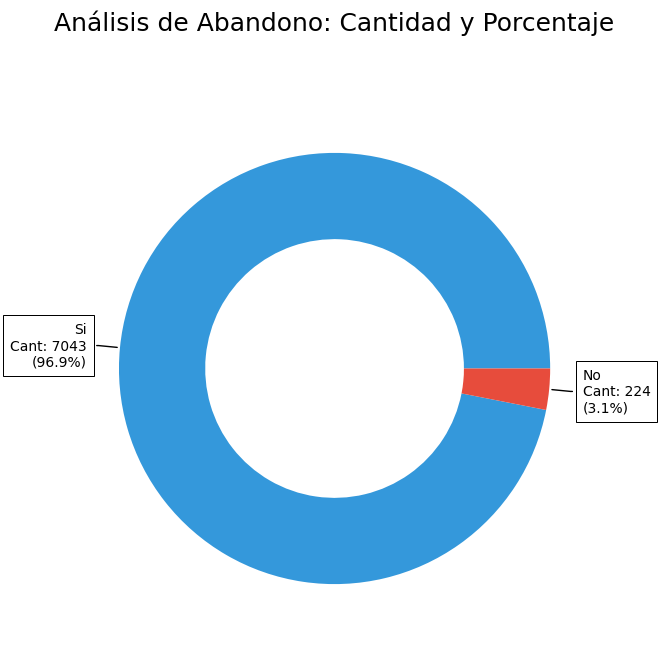

In [11]:
# 1. Preparar los datos
counts = df['Churn'].value_counts()
labels = ['Si', 'No']
values = counts.values
total = sum(values)

# 2. Configuración estética
colores = ['#3498db', '#e74c3c'] # Azul (No), Rojo (Yes)

fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

# 3. Crear el gráfico de dona (usando wedgeprops para el hueco)
wedges, texts = ax.pie(values, wedgeprops=dict(width=0.4), startangle=0, colors=colores)

# 4. Configurar las líneas y etiquetas externas
bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    # Calcular el ángulo de la rebanada
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))

    # Definir la dirección de la señalización (fuera del círculo)
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})

    # Formatear el texto: Cantidad Real y Porcentaje
    percentage = (values[i] / total) * 100
    texto_etiqueta = f"{labels[i]}\nCant: {values[i]}\n({percentage:.1f}%)"

    # Dibujar la anotación
    ax.annotate(texto_etiqueta, xy=(x, y), xytext=(1.15*np.sign(x), 1.1*y),
                horizontalalignment=horizontalalignment, **kw, fontsize=10)

plt.title("Análisis de Abandono: Cantidad y Porcentaje", fontsize=18, pad=50)
plt.show()

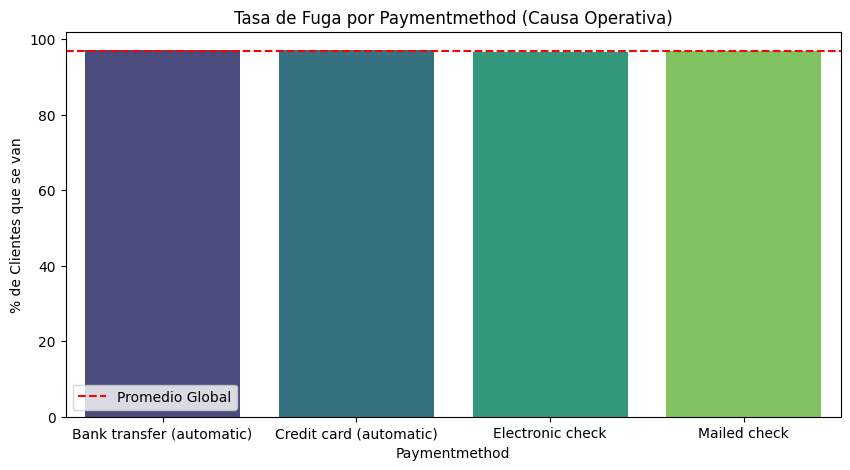

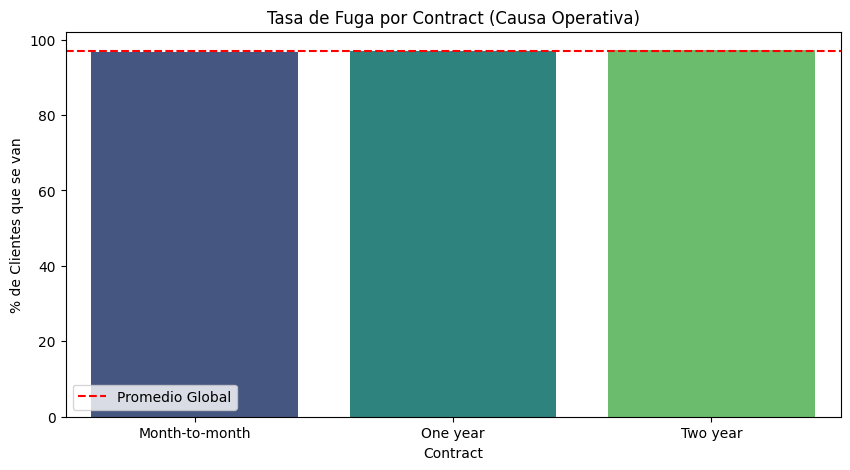

In [12]:
def plot_churn_rate(df, column):
    # Calculamos el porcentaje de fuga por categoría
    churn_rate = df.groupby(column)['Churn'].mean() * 100

    plt.figure(figsize=(10, 5))
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="viridis")
    plt.axhline(y=df['Churn'].mean()*100, color='r', linestyle='--', label='Promedio Global')
    plt.title(f'Tasa de Fuga por {column} (Causa Operativa)')
    plt.ylabel('% de Clientes que se van')
    plt.legend()
    plt.show()

# Ejecuta esto en tu entorno:
plot_churn_rate(df, 'Paymentmethod')
plot_churn_rate(df, 'Contract')

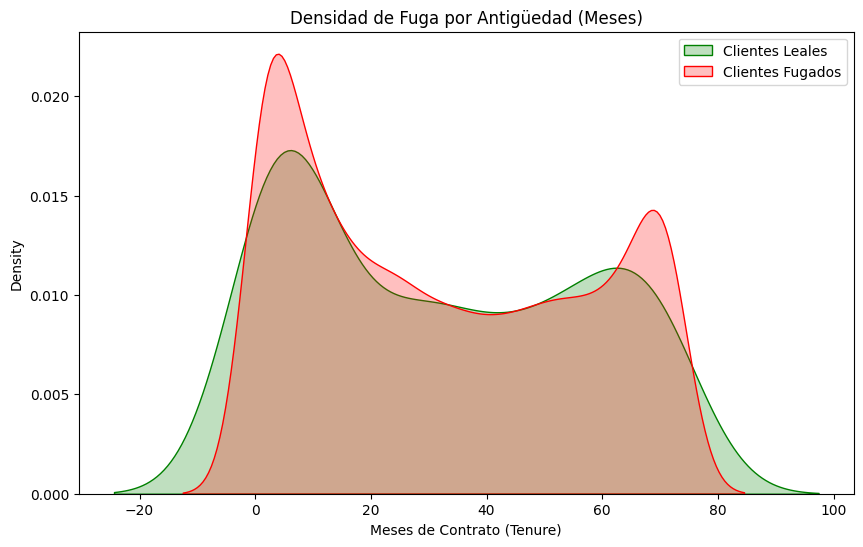

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Churn'] == 0]['Tenure'], color='green', shade=True, label='Clientes Leales')
sns.kdeplot(df[df['Churn'] == 1]['Tenure'], color='red', shade=True, label='Clientes Fugados')
plt.title('Densidad de Fuga por Antigüedad (Meses)')
plt.xlabel('Meses de Contrato (Tenure)')
plt.legend()
plt.show()

--- Generando Tablero de Diagnóstico ---


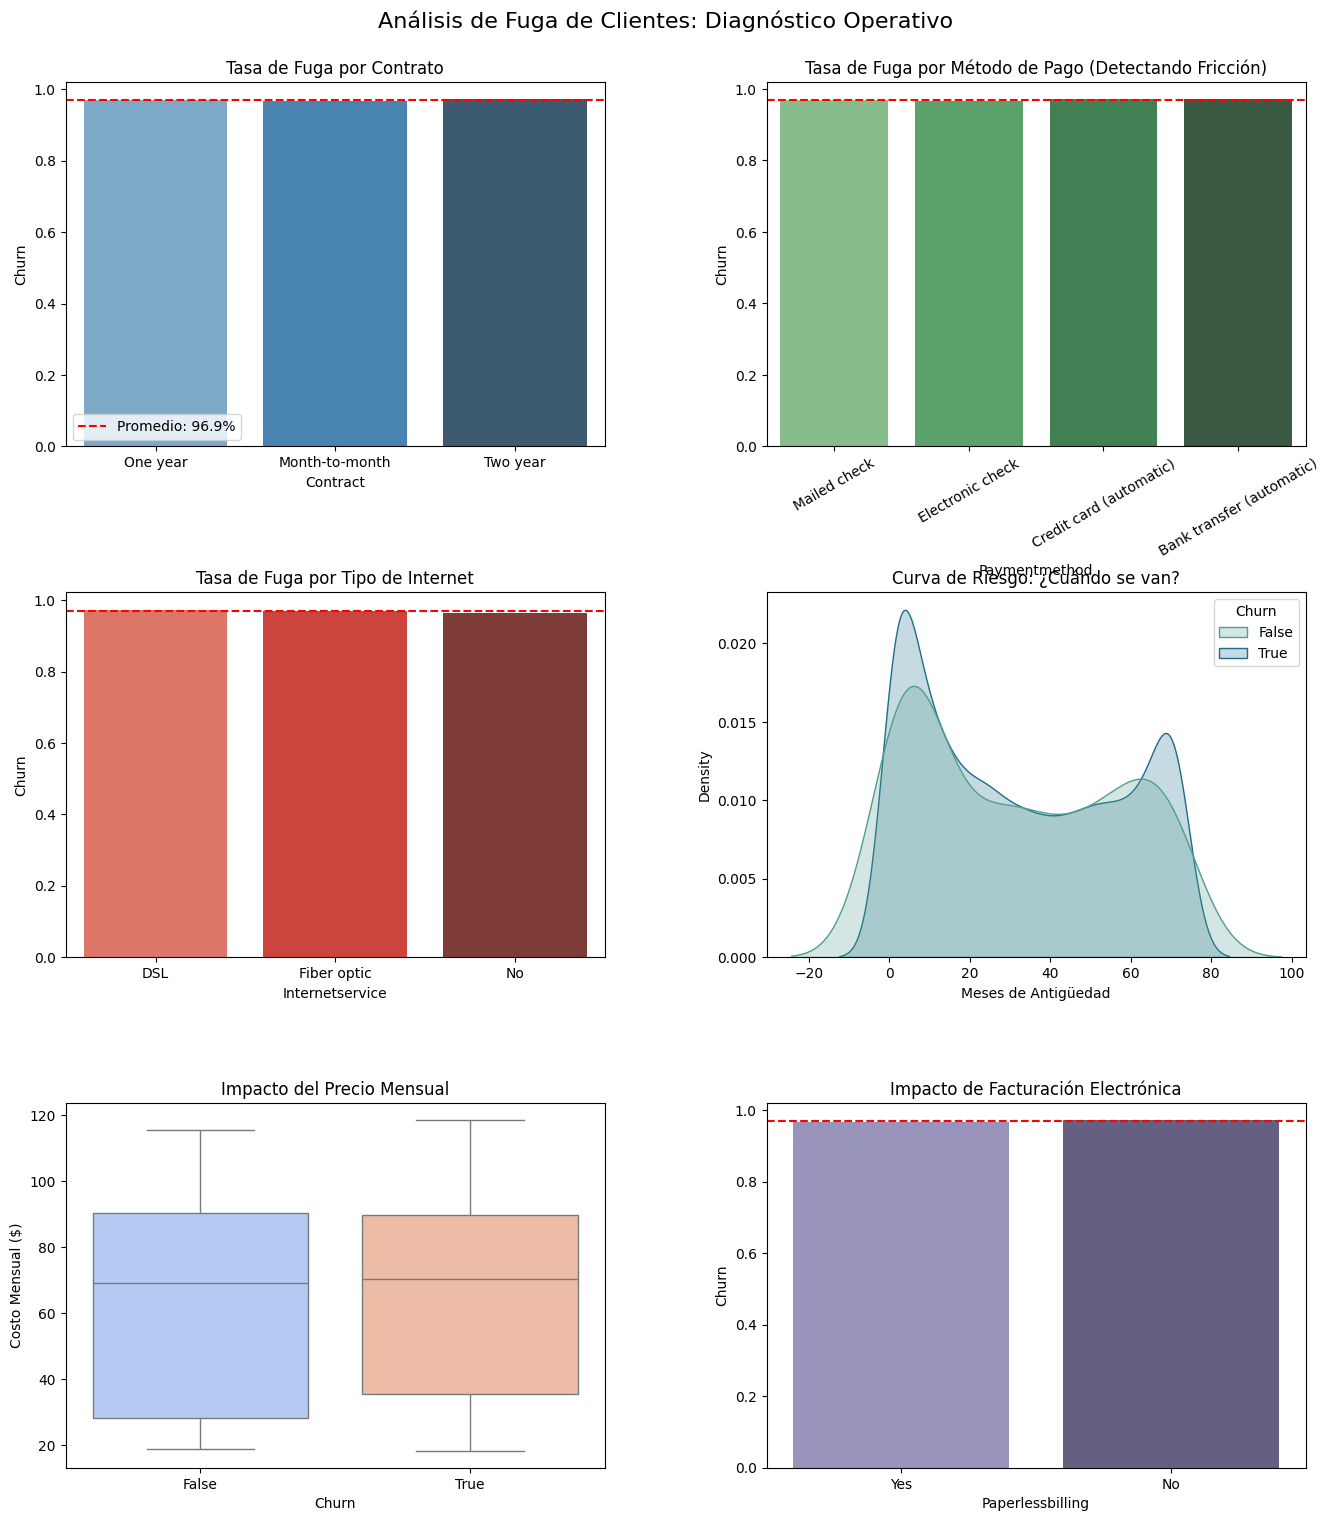

In [17]:
print("--- Generando Tablero de Diagnóstico ---")

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle('Análisis de Fuga de Clientes: Diagnóstico Operativo', fontsize=16, y=0.92)

# Tasa promedio para línea de referencia
avg_churn = df['Churn'].mean()

# G1: Contrato (Compromiso)
sns.barplot(x='Contract', y='Churn', data=df, ax=axes[0, 0], palette='Blues_d', errorbar=None)
axes[0, 0].set_title('Tasa de Fuga por Contrato')
axes[0, 0].axhline(avg_churn, color='r', linestyle='--', label=f'Promedio: {avg_churn:.1%}')
axes[0, 0].legend()

# G2: Método de Pago (Fricción)
sns.barplot(x='Paymentmethod', y='Churn', data=df, ax=axes[0, 1], palette='Greens_d', errorbar=None)
axes[0, 1].set_title('Tasa de Fuga por Método de Pago (Detectando Fricción)')
axes[0, 1].tick_params(axis='x', rotation=30)
axes[0, 1].axhline(avg_churn, color='r', linestyle='--')

# G3: Internet (Producto)
sns.barplot(x='Internetservice', y='Churn', data=df, ax=axes[1, 0], palette='Reds_d', errorbar=None)
axes[1, 0].set_title('Tasa de Fuga por Tipo de Internet')
axes[1, 0].axhline(avg_churn, color='r', linestyle='--')

# G4: Antigüedad (Ciclo de Vida)
sns.kdeplot(data=df, x='Tenure', hue='Churn', fill=True, ax=axes[1, 1], palette='crest', common_norm=False)
axes[1, 1].set_title('Curva de Riesgo: ¿Cuándo se van?')
axes[1, 1].set_xlabel('Meses de Antigüedad')

# G5: Sensibilidad al Precio
sns.boxplot(x='Churn', y='Monthly', data=df, ax=axes[2, 0], palette='coolwarm')
axes[2, 0].set_title('Impacto del Precio Mensual')
axes[2, 0].set_ylabel('Costo Mensual ($)')

# G6: Facturación Digital
sns.barplot(x='Paperlessbilling', y='Churn', data=df, ax=axes[2, 1], palette='Purples_d', errorbar=None)
axes[2, 1].set_title('Impacto de Facturación Electrónica')
axes[2, 1].axhline(avg_churn, color='r', linestyle='--')

plt.show()

#📄Informe final